In [189]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [6]:
Reviews_train= pd.read_csv("/Users/rajeev.maram/train.tsv",sep='\t')
Reviews_test= pd.read_csv("/Users/rajeev.maram/test.tsv",sep='\t')

In [69]:
Reviews_train.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [14]:
Reviews_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [17]:
Reviews_train.shape,Reviews_test.shape

((156060, 4), (66292, 3))

In [15]:
Reviews_train["Sentiment"].unique()

array([1, 2, 3, 4, 0])

In [45]:
#To view particular Review and its associated rows
Reviews_train.loc[Reviews_train['SentenceId'] == 1110, 'Phrase']

24414    What ultimately makes Windtalkers a disappoint...
24415                    What ultimately makes Windtalkers
24416                         ultimately makes Windtalkers
24417                                    makes Windtalkers
24418    a disappointment is the superficial way it dea...
24419                                     a disappointment
24420                                       disappointment
24421     is the superficial way it deals with its story .
24422       is the superficial way it deals with its story
24423          the superficial way it deals with its story
24424                                  the superficial way
24425                                      superficial way
24426                              it deals with its story
24427                                 deals with its story
24428                                       with its story
24429                                            its story
Name: Phrase, dtype: object

In [78]:
count=Counter(Reviews_train["Sentiment"])

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

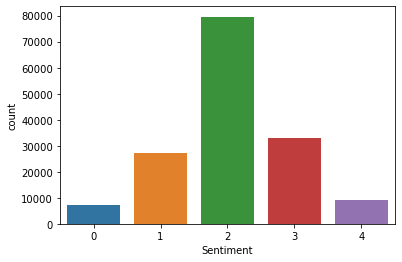

In [92]:
#count plot of variable sentiment.
sns.countplot(x="Sentiment",data=Reviews_train)

In [137]:
Reviews_train.iloc[:,0:3].shape, Reviews_train.iloc[:,3:4].shape

((156060, 3), (156060, 1))

In [118]:
text = " ".join(review for review in Reviews_train.Phrase)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6432359 words in the combination of all review.


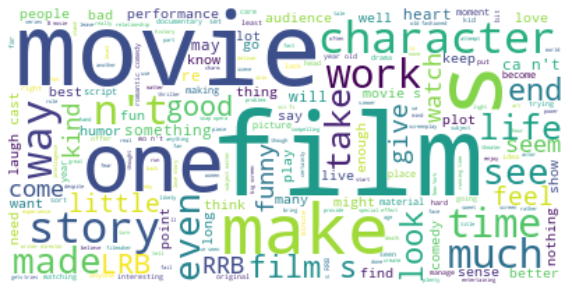

In [125]:
# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [140]:
X=Reviews_train['Phrase'].values
Y=Reviews_train['Sentiment'].values
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3)

In [141]:
# Approach one: tf_idf
vec = TfidfVectorizer()
vec.fit(X_train)
x_train=vec.transform(X_train)
x_test=vec.transform(X_test)

In [168]:
lr = LogisticRegression(max_iter=200,random_state=0,solver='lbfgs')
lr.fit(x_train,Y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=0)

In [169]:
Y_pred = lr.predict(x_test)
score =accuracy_score(Y_test,Y_pred)
print(score)


0.6364646076295442


In [171]:
#Approach two: CountVectorizer using sequential neural networks
vec = CountVectorizer()
vec.fit(X_train)
x_train=vec.transform(X_train)
x_test=vec.transform(X_test)

In [175]:
model = Sequential()
model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [183]:
model.fit(
    x_train,
    Y_train,
    batch_size=64,
    epochs=2)

Epoch 1/2
1707/1707 [==============================] - 3s 2ms/step - loss: -197429.0469 - accuracy: 0.1748
Epoch 2/2
1707/1707 [==============================] - 3s 2ms/step - loss: -362788.5625 - accuracy: 0.1748


In [191]:
results=pd.DataFrame(y_pred, columns=['Predicted_Sentiment'])

<AxesSubplot:xlabel='Predicted_Sentiment', ylabel='count'>

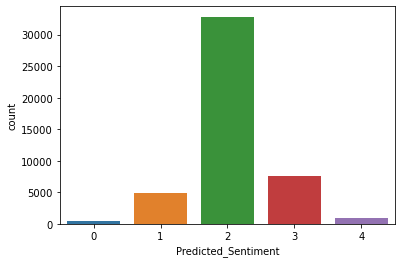

In [192]:
sns.countplot(x="Predicted_Sentiment",data=results)

In [197]:
Actuals=pd.DataFrame(Y_test,columns=['Actuals'])

In [204]:
X=pd.DataFrame(X_test)

In [205]:
final=pd.concat([X,Actuals,results],axis=1, ignore_index=True)

In [208]:
# 0 is Review, 1 is Actual Sentiment Values, 2 is Predicted Sentiment Values
final

,0,1,2
0,an album of photos,2,2
1,with `` XXX '',2,2
2,cuss him,2,2
3,an artistry,3,2
4,the worst thing,0,0
...,...,...,...
46813,`` gory mayhem '' is your idea of a good time,3,2
46814,ideas for the inevitable future sequels,2,2
46815,his penchant for tearing up on cue -- things t...,4,2
46816,you can with a stuttering script,1,1
